<a href="https://colab.research.google.com/github/silaholmes/Tourify_depiGP/blob/main/ML_graduation_project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import google.colab as colab
from IPython.display import display
from transformers import pipeline
import ast
import re

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
uploaded = colab.files.upload()

In [ ]:
df = pd.read_csv("recipes_data.csv")
df.drop(columns=['image'], inplace=True)
df.insert(0, "id", range(1, len(df) + 1))
df['class'] = df['class'].apply(lambda x: ast.literal_eval(x))
#display(df.head())
#display(df.tail())
#print(df.info())
#print(df.describe())
#df.isnull().sum()
#df = df.dropna()

In [ ]:
mlb = MultiLabelBinarizer()
encoded_data = pd.DataFrame(mlb.fit_transform(df['class']), columns=mlb.classes_)
df_new = df.drop(columns=['class'])
df_new = pd.concat([df_new, encoded_data], axis=1)
print(df_new.columns)

Index(['id', 'name', 'ingredients', 'price', 'calories', 'protein', 'minerals',
       'carb', 'fiber', 'fat', 'diabetes', 'category', 'diet', 'allergy',
       'type', 'breakfast', 'dinner', 'lunch'],
      dtype='object')


In [ ]:
df_new["diabetes"] = df_new["diabetes"].astype(int)
display(df_new.head())

,id,name,ingredients,price,calories,protein,minerals,carb,fiber,fat,diabetes,category,diet,allergy,type,breakfast,dinner,lunch
0,1,Lactose-Free Chocolate Cake,"['lactose-free flour', 'coconut milk', 'cocoa ...",112,350,5g,"{'iron': '2mg', 'calcium': '30mg', 'potassium'...",45g,3g,15g,0,allergy,none,lactose,dessert,0,1,1
1,2,Dairy-Free Alfredo Pasta,"['gluten-free pasta', 'cashew cream', 'garlic'...",115,400,10g,"{'iron': '2.5mg', 'calcium': '40mg', 'potassiu...",50g,5g,18g,0,allergy,none,lactose,meat,0,1,1
2,3,Lactose-Free Mashed Potatoes,"['potatoes', 'olive oil', 'almond milk', 'garl...",110,250,3g,"{'iron': '1.2mg', 'calcium': '20mg', 'potassiu...",35g,4g,8g,0,allergy,none,lactose,salad,0,1,1
3,4,Dairy-Free Pancakes,"['oats', 'almond milk', 'banana', 'baking powd...",18,300,7g,"{'iron': '1.8mg', 'calcium': '50mg', 'potassiu...",40g,6g,10g,0,allergy,none,lactose,dessert,0,1,1
4,5,Lactose-Free Cheesecake,"['lactose-free cream cheese', 'gluten-free cru...",118,450,8g,"{'iron': '1.5mg', 'calcium': '100mg', 'potassi...",55g,2g,25g,0,allergy,none,lactose,dessert,0,1,1


In [ ]:
categorical = ["category", "diet", "allergy"]
encoder = OneHotEncoder()
transformer = make_column_transformer((encoder, categorical), remainder="passthrough", verbose_feature_names_out=False)
transformed_data = transformer.fit_transform(df_new)
user_train_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())

In [ ]:
print(user_train_df.columns)
display(user_train_df.head())

Index(['category_allergy', 'category_diabetes', 'category_diet',
       'diet_high-carb', 'diet_keto', 'diet_low-carb', 'diet_none',
       'diet_vegan', 'allergy_allergy', 'allergy_lactose', 'allergy_none',
       'allergy_peanuts', 'allergy_shellfish', 'allergy_wheat', 'id', 'name',
       'ingredients', 'price', 'calories', 'protein', 'minerals', 'carb',
       'fiber', 'fat', 'diabetes', 'type', 'breakfast', 'dinner', 'lunch'],
      dtype='object')


,category_allergy,category_diabetes,category_diet,diet_high-carb,diet_keto,diet_low-carb,diet_none,diet_vegan,allergy_allergy,allergy_lactose,...,protein,minerals,carb,fiber,fat,diabetes,type,breakfast,dinner,lunch
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,5g,"{'iron': '2mg', 'calcium': '30mg', 'potassium'...",45g,3g,15g,0,dessert,0,1,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,10g,"{'iron': '2.5mg', 'calcium': '40mg', 'potassiu...",50g,5g,18g,0,meat,0,1,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3g,"{'iron': '1.2mg', 'calcium': '20mg', 'potassiu...",35g,4g,8g,0,salad,0,1,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,7g,"{'iron': '1.8mg', 'calcium': '50mg', 'potassiu...",40g,6g,10g,0,dessert,0,1,1
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,8g,"{'iron': '1.5mg', 'calcium': '100mg', 'potassi...",55g,2g,25g,0,dessert,0,1,1


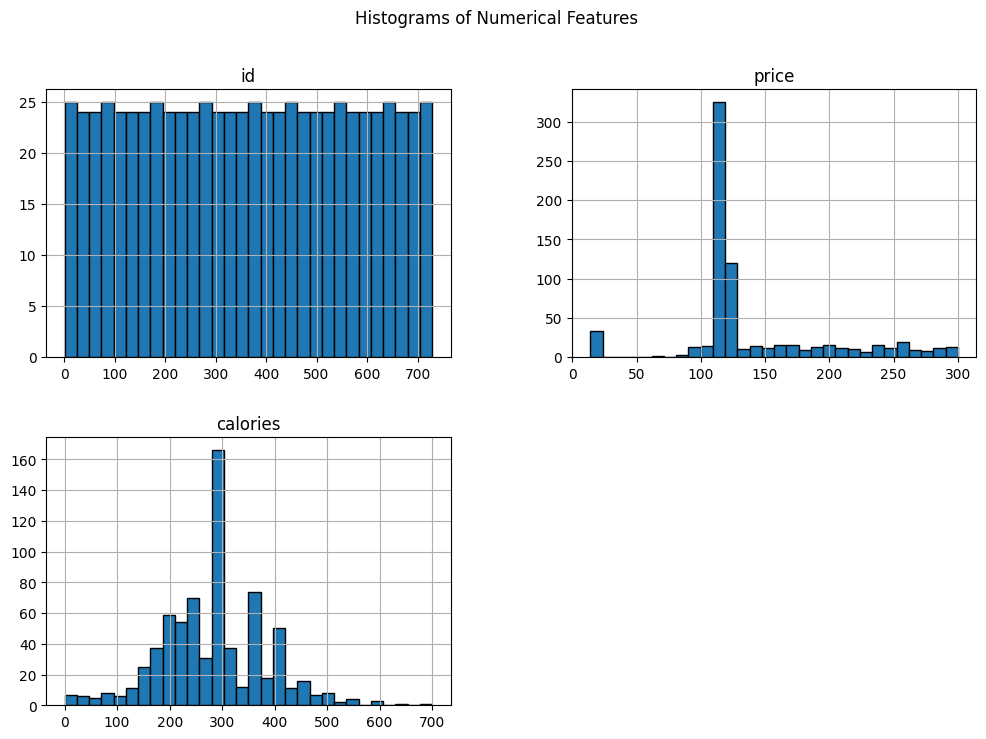

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

<ipython-input-13-97680e783a8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["diabetes"], y=df["calories"], palette="Set2")


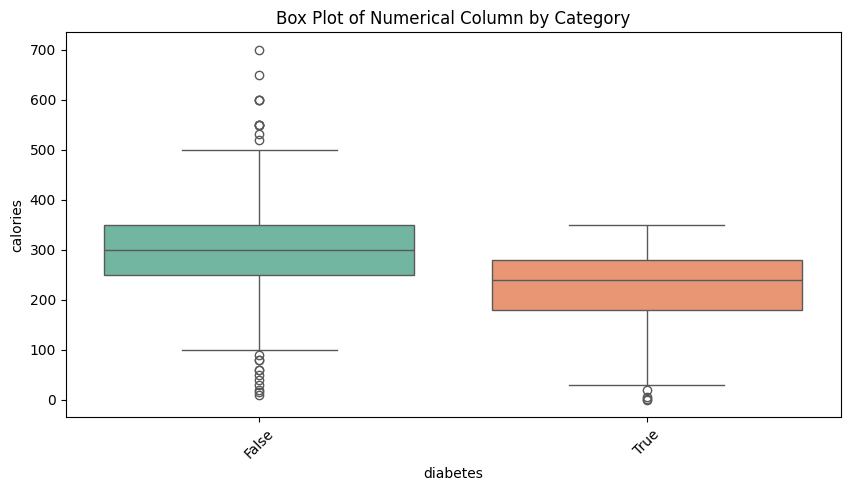

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["diabetes"], y=df["calories"], palette="Set2")
plt.title("Box Plot of Numerical Column by Category")
plt.xticks(rotation=45)
plt.show()

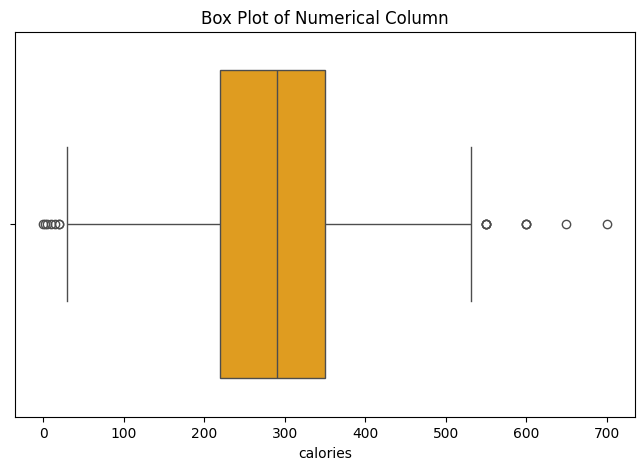

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["calories"], color="orange")
plt.title("Box Plot of Numerical Column")
plt.show()

In [ ]:
meal_data = df_new[['allergy', 'diet','diabetes','type', 'breakfast', 'dinner', 'lunch']]
filtered_rows = df_new.loc[df["allergy"] == "shellfish"]
display(filtered_rows)

,id,name,ingredients,price,calories,protein,minerals,carb,fiber,fat,diabetes,category,diet,allergy,type,breakfast,dinner,lunch
70,71,Vegetarian Pad Thai,"['rice noodles', 'tofu', 'bean sprouts', 'pean...",112,450,15g,"{'iron': '3mg', 'calcium': '60mg', 'potassium'...",60g,6g,15g,0,allergy,none,shellfish,meat,0,1,1
71,72,Chicken Caesar Salad,"['romaine lettuce', 'grilled chicken', 'parmes...",110,350,20g,"{'iron': '2mg', 'calcium': '50mg', 'potassium'...",20g,3g,18g,0,allergy,none,shellfish,meat,0,1,1
72,73,Vegan Burrito Bowl,"['brown rice', 'black beans', 'avocado', 'sals...",111,400,12g,"{'iron': '2.5mg', 'calcium': '40mg', 'potassiu...",50g,10g,15g,0,allergy,none,shellfish,salad,1,1,1
73,74,Eggplant Parmesan,"['eggplant', 'marinara sauce', 'mozzarella che...",114,300,10g,"{'iron': '1.8mg', 'calcium': '70mg', 'potassiu...",25g,6g,18g,0,allergy,none,shellfish,meat,0,1,1
74,75,Roasted Vegetable Medley,"['zucchini', 'carrots', 'bell peppers', 'olive...",18,200,4g,"{'iron': '1.2mg', 'calcium': '30mg', 'potassiu...",20g,5g,10g,0,allergy,none,shellfish,salad,1,1,1
75,76,Grilled Chicken and Quinoa Salad,"['grilled chicken', 'quinoa', 'arugula', 'cher...",113,400,30g,"{'iron': '3mg', 'calcium': '40mg', 'potassium'...",35g,6g,18g,0,allergy,none,shellfish,meat,0,1,1
76,77,Sweet Potato and Black Bean Chili,"['sweet potatoes', 'black beans', 'tomatoes', ...",110,300,10g,"{'iron': '2mg', 'calcium': '30mg', 'potassium'...",40g,10g,8g,0,allergy,none,shellfish,soup,0,1,1
77,78,Coconut Curry Lentils,"['red lentils', 'coconut milk', 'curry powder'...",19,350,14g,"{'iron': '3.5mg', 'calcium': '50mg', 'potassiu...",45g,12g,12g,0,allergy,none,shellfish,soup,0,1,1
78,79,Vegetable Stir-Fry,"['broccoli', 'carrots', 'snap peas', 'soy sauc...",111,250,8g,"{'iron': '2mg', 'calcium': '20mg', 'potassium'...",30g,6g,10g,0,allergy,none,shellfish,salad,0,1,1
79,80,Greek Salad,"['cucumbers', 'tomatoes', 'feta cheese', 'red ...",110,200,5g,"{'iron': '1.5mg', 'calcium': '60mg', 'potassiu...",15g,4g,12g,0,allergy,none,shellfish,salad,0,1,1


In [ ]:
user_data = {
    "dietType": ["keto"],
    "diabetes": [True],
    "foodAllergies": ["shellfish"],
    "mealType": ["meat"],
    "mealTime": ["dinner"]
}

def clean_text(text):
    if isinstance(text, list):
        text = " ".join(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

user_profile = f"{' '.join(user_data['dietType'])} {' '.join(user_data['foodAllergies'])} diabetes-{user_data['diabetes'][0]} {' '.join(user_data['mealType'])}"
user_profile = clean_text(user_profile)

filtered_meals = []
for index, meal in meal_data.iterrows():
    meal_text = clean_text(f"{meal['diet']} {meal['allergy']} diabetes-{meal['diabetes']} {meal['type']}")
    meal_dict = meal.to_dict()
    meal_dict["text"] = meal_text

    if (meal_dict["diet"] in user_data["dietType"]) and \
       (meal_dict["allergy"] in user_data["foodAllergies"]) and \
       (meal_dict["type"] in user_data["mealType"] or meal_dict["type"] == "none") and \
       (meal_dict["diabetes"] in user_data["diabetes"] or meal_dict["diabetes"] == False ) and \
       any(meal_dict[time] == 1 for time in user_data["mealTime"]):

        filtered_meals.append(meal_dict)

vectorizer = TfidfVectorizer()
documents = [user_profile] + [meal["text"] for meal in filtered_meals]
tfidf_matrix = vectorizer.fit_transform(documents)

similarity_scores = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

filtered_meal_df = pd.DataFrame(filtered_meals)
filtered_meal_df["similarity"] = similarity_scores

filtered_meal_df = filtered_meal_df.sort_values(by="similarity", ascending=False)

print(filtered_meal_df[['allergy', 'diet','diabetes','type','dinner',"similarity"]])

     allergy  diet  diabetes  type  dinner  similarity
0  shellfish  keto         0  meat       1    0.573875
1  shellfish  keto         0  meat       1    0.573875


In [ ]:
print(df.columns)
#display(user_train_df)
print(df["price"].unique())
print(df["allergy"].unique())
print(df["category"].unique())
print(df["type"].value_counts().get("chicken", 0))
print(df["type"].unique())
print(df["class"].unique())
filtered_rows = df.loc[df["type"] == "burger"]
display(filtered_rows)

Index(['id', 'name', 'ingredients', 'price', 'calories', 'protein', 'minerals',
       'carb', 'fiber', 'fat', 'diabetes', 'category', 'diet', 'allergy',
       'class', 'type'],
      dtype='object')
[112 115 110  18 118 114 120 116  17  19 111 113 125 122 117  81  91  71
 119 121 124  16  15  14 126 128 127 129 123 108 209 271 155 167 235 280
  94 274 191 140 170 156 241 294 266 216 198 193 246 172 283 221 233 197
 148 158 204 257 104 253  92 208 297 166 205 300 242 132 141 143 150 220
 234 259 196 229 174 270 264 133 102 105 224 237 157 202 262 240 183 159
 250 217 168 210 160 225 188 260 203 265 101 135 218 290 298 214 162 106
 164  98 200 189 295 299 139 192 278 142 292 248 182 179 163 213 103 194
 190 184 261 100 207 238 169 287 154 211 281 275 244 151 178 296 289 255
 136 152 285 186 288 109 256 138 232 284 195  99 258 171 252 201 231 239
 175 286 243]
['lactose' 'peanuts' 'allergy' 'shellfish' 'wheat' 'none']
['allergy' 'diabetes' 'diet']
3
['dessert' 'meat' 'salad' 'drink' 'so

,id,name,ingredients,price,calories,protein,minerals,carb,fiber,fat,diabetes,category,diet,allergy,class,type
